<a href="https://colab.research.google.com/github/birukzlab/Breast-Cancer-Wisconsin---ML/blob/main/Predicting%20Breast%20Cancer%20Wisconsin%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Wisconsin (Dignostic)

Source: UCI Machine Learning Repository.

Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Data preprocessing

In [3]:

cols = ["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1",
        "concavity1", "concave_points1", "symmetry1", "factual_dimension1", "radius2", "texture2", "perimeter2", "area2",
        "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "factual_dimension2", "radius3",
        "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3",
        "symmetry3", "factual_dimension3"]
df = pd.read_csv('wdbc.data', names=cols)

df = df.drop(columns=["ID"])

In [4]:
column_mappings = {
    "radius1": "mean_radius",
    "texture1": "mean_texture",
    "perimeter1": "mean_perimeter",
    "area1": "mean_area",
    "smoothness1": "mean_smoothness",
    "compactness1": "mean_compactness",
    "concavity1": "mean_concavity",
    "concave_points1": "mean_concave_points",
    "symmetry1": "mean_symmetry",
    "factual_dimension1": "mean_factual_dimension",
    "radius2": "radius_se",
    "texture2": "texture_se",
    "perimeter2": "perimeter_se",
    "area2": "area_se",
    "smoothness2": "smoothness_se",
    "compactness2": "compactness_se",
    "concavity2": "concavity_se",
    "concave_points2": "concave_points_se",
    "symmetry2": "symmetry_se",
    "factual_dimension2": "factual_dimension_se",
    "radius3": "worst_radius",
    "texture3": "worst_texture",
    "perimeter3": "worst_perimeter",
    "area3": "worst_area",
    "smoothness3": "worst_smoothness",
    "compactness3": "worst_compactness",
    "concavity3": "worst_concavity",
    "concave_points3": "worst_concave_points",
    "symmetry3": "worst_symmetry",
    "factual_dimension3": "worst_factual_dimension",

}

# Rename columns
df.rename(columns=column_mappings, inplace=True)

# Display the updated DataFrame
df.head()

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_factual_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
pd.set_option("display.max_columns", None)
df.head(10)


,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_factual_dimension,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,factual_dimension_se,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_factual_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [6]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   mean_radius              569 non-null    float64
 2   mean_texture             569 non-null    float64
 3   mean_perimeter           569 non-null    float64
 4   mean_area                569 non-null    float64
 5   mean_smoothness          569 non-null    float64
 6   mean_compactness         569 non-null    float64
 7   mean_concavity           569 non-null    float64
 8   mean_concave_points      569 non-null    float64
 9   mean_symmetry            569 non-null    float64
 10  mean_factual_dimension   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [8]:
# Assuming df is your DataFrame
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})


In [77]:
#df["Diagnosis"] = (df["Diagnosis"]== "M").astype(int)

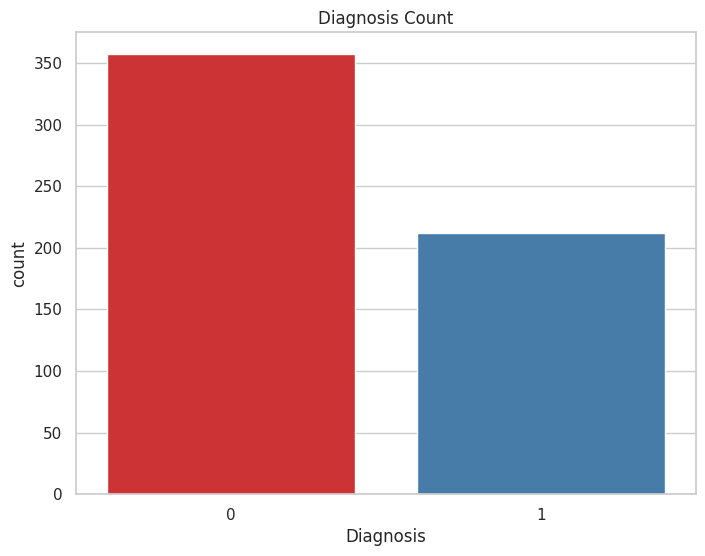

In [9]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Countplot for the diagnosis (M = malignant, B = benign)
plt.figure(figsize=(8, 6))
sns.countplot(x="Diagnosis", data=df, palette="Set1")
plt.title("Diagnosis Count")
plt.show()




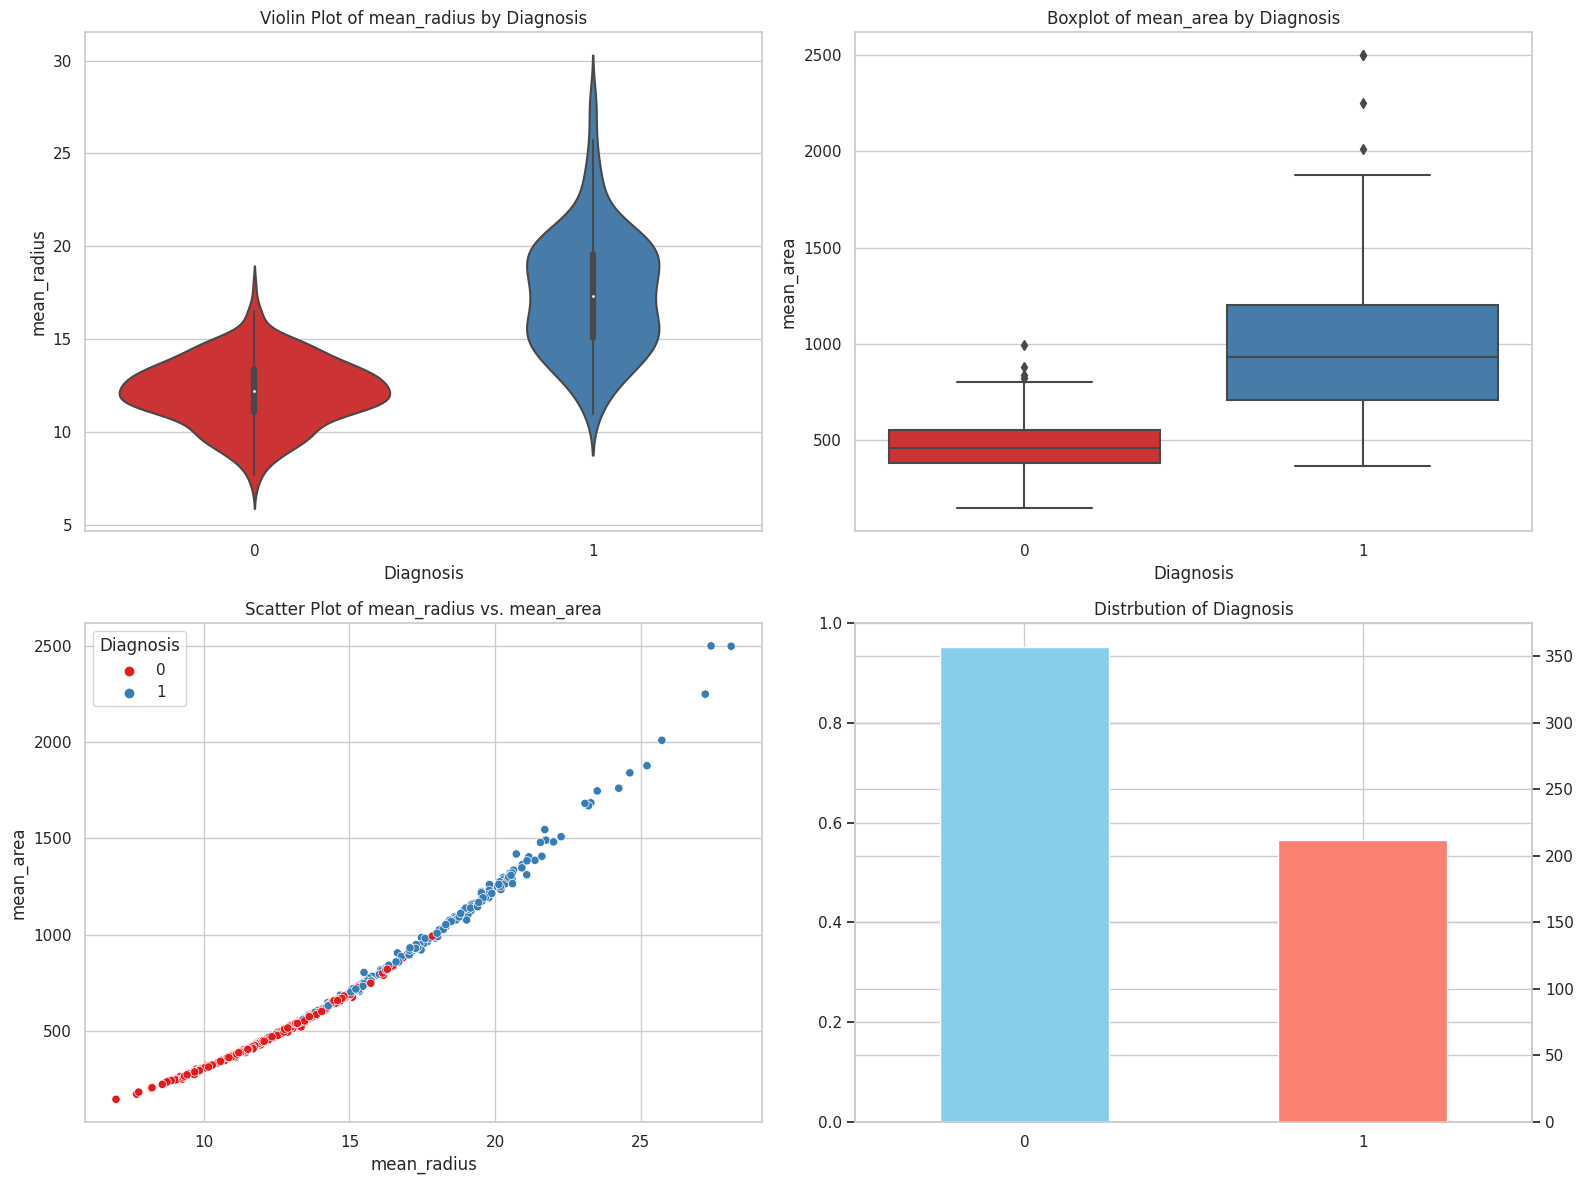

In [10]:
# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Simplified Violin plot for radius1 vs. Diagnosis
sns.violinplot(x="Diagnosis", y="mean_radius", data=df, palette="Set1", ax=axes[0, 0])
axes[0, 0].set_title("Violin Plot of mean_radius by Diagnosis")

# Simplified Boxplot for area1 vs. Diagnosis
sns.boxplot(x="Diagnosis", y="mean_area", data=df, palette="Set1", ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of mean_area by Diagnosis")

# Scatter plot for radius1 vs. area1 with hue as Diagnosis
sns.scatterplot(x="mean_radius", y="mean_area", hue="Diagnosis", data=df, palette="Set1", ax=axes[1, 0])
axes[1, 0].set_title("Scatter Plot of mean_radius vs. mean_area")

# Distrbution of Diagnosis
df["Diagnosis"].value_counts().plot(kind="bar", color=["skyblue", "salmon"], ax=axes[1, 1].twinx())
axes[1, 1].set_title("Distrbution of Diagnosis")

# Adjust layout
plt.tight_layout()
plt.show()

### Violin Plot of radius1 by Diagnosis:

*   The violin plot displays the distribution of the radius1 feature for each diagnosis class (Malignant and Benign).
*   As we can see on the plot, Malignant tumors tend to have a wider range of values for radius1 compared to benign tumors.

*   This suggests that the radius1 feature could be indicative of tumor malignancy, with larger values associated with malignant cases.

### Boxplot of area1 by Diagnosis:

*   The boxplot illustrates the distribution of the area1 feature for both diagnosis classes.

*   Malignant tumors generally exhibit larger areas compared to benign tumors.

*  The clear distinction in the boxplots suggests that area1 is a potentially significant feature in predicting tumor diagnosis.

### Scatter Plot of radius1 vs. area1:

*   The scatter plot provides insights into the relationship between radius1 and area1, with points colored by diagnosis.

*  There appears to be a positive correlation between radius1 and area1, as expected.

*  Malignant cases are concentrated in the region with higher values of both radius1 and area1.










In [69]:
df.columns

Index(['Diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_factual_dimension',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'factual_dimension_se', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_factual_dimension'],
      dtype='object')

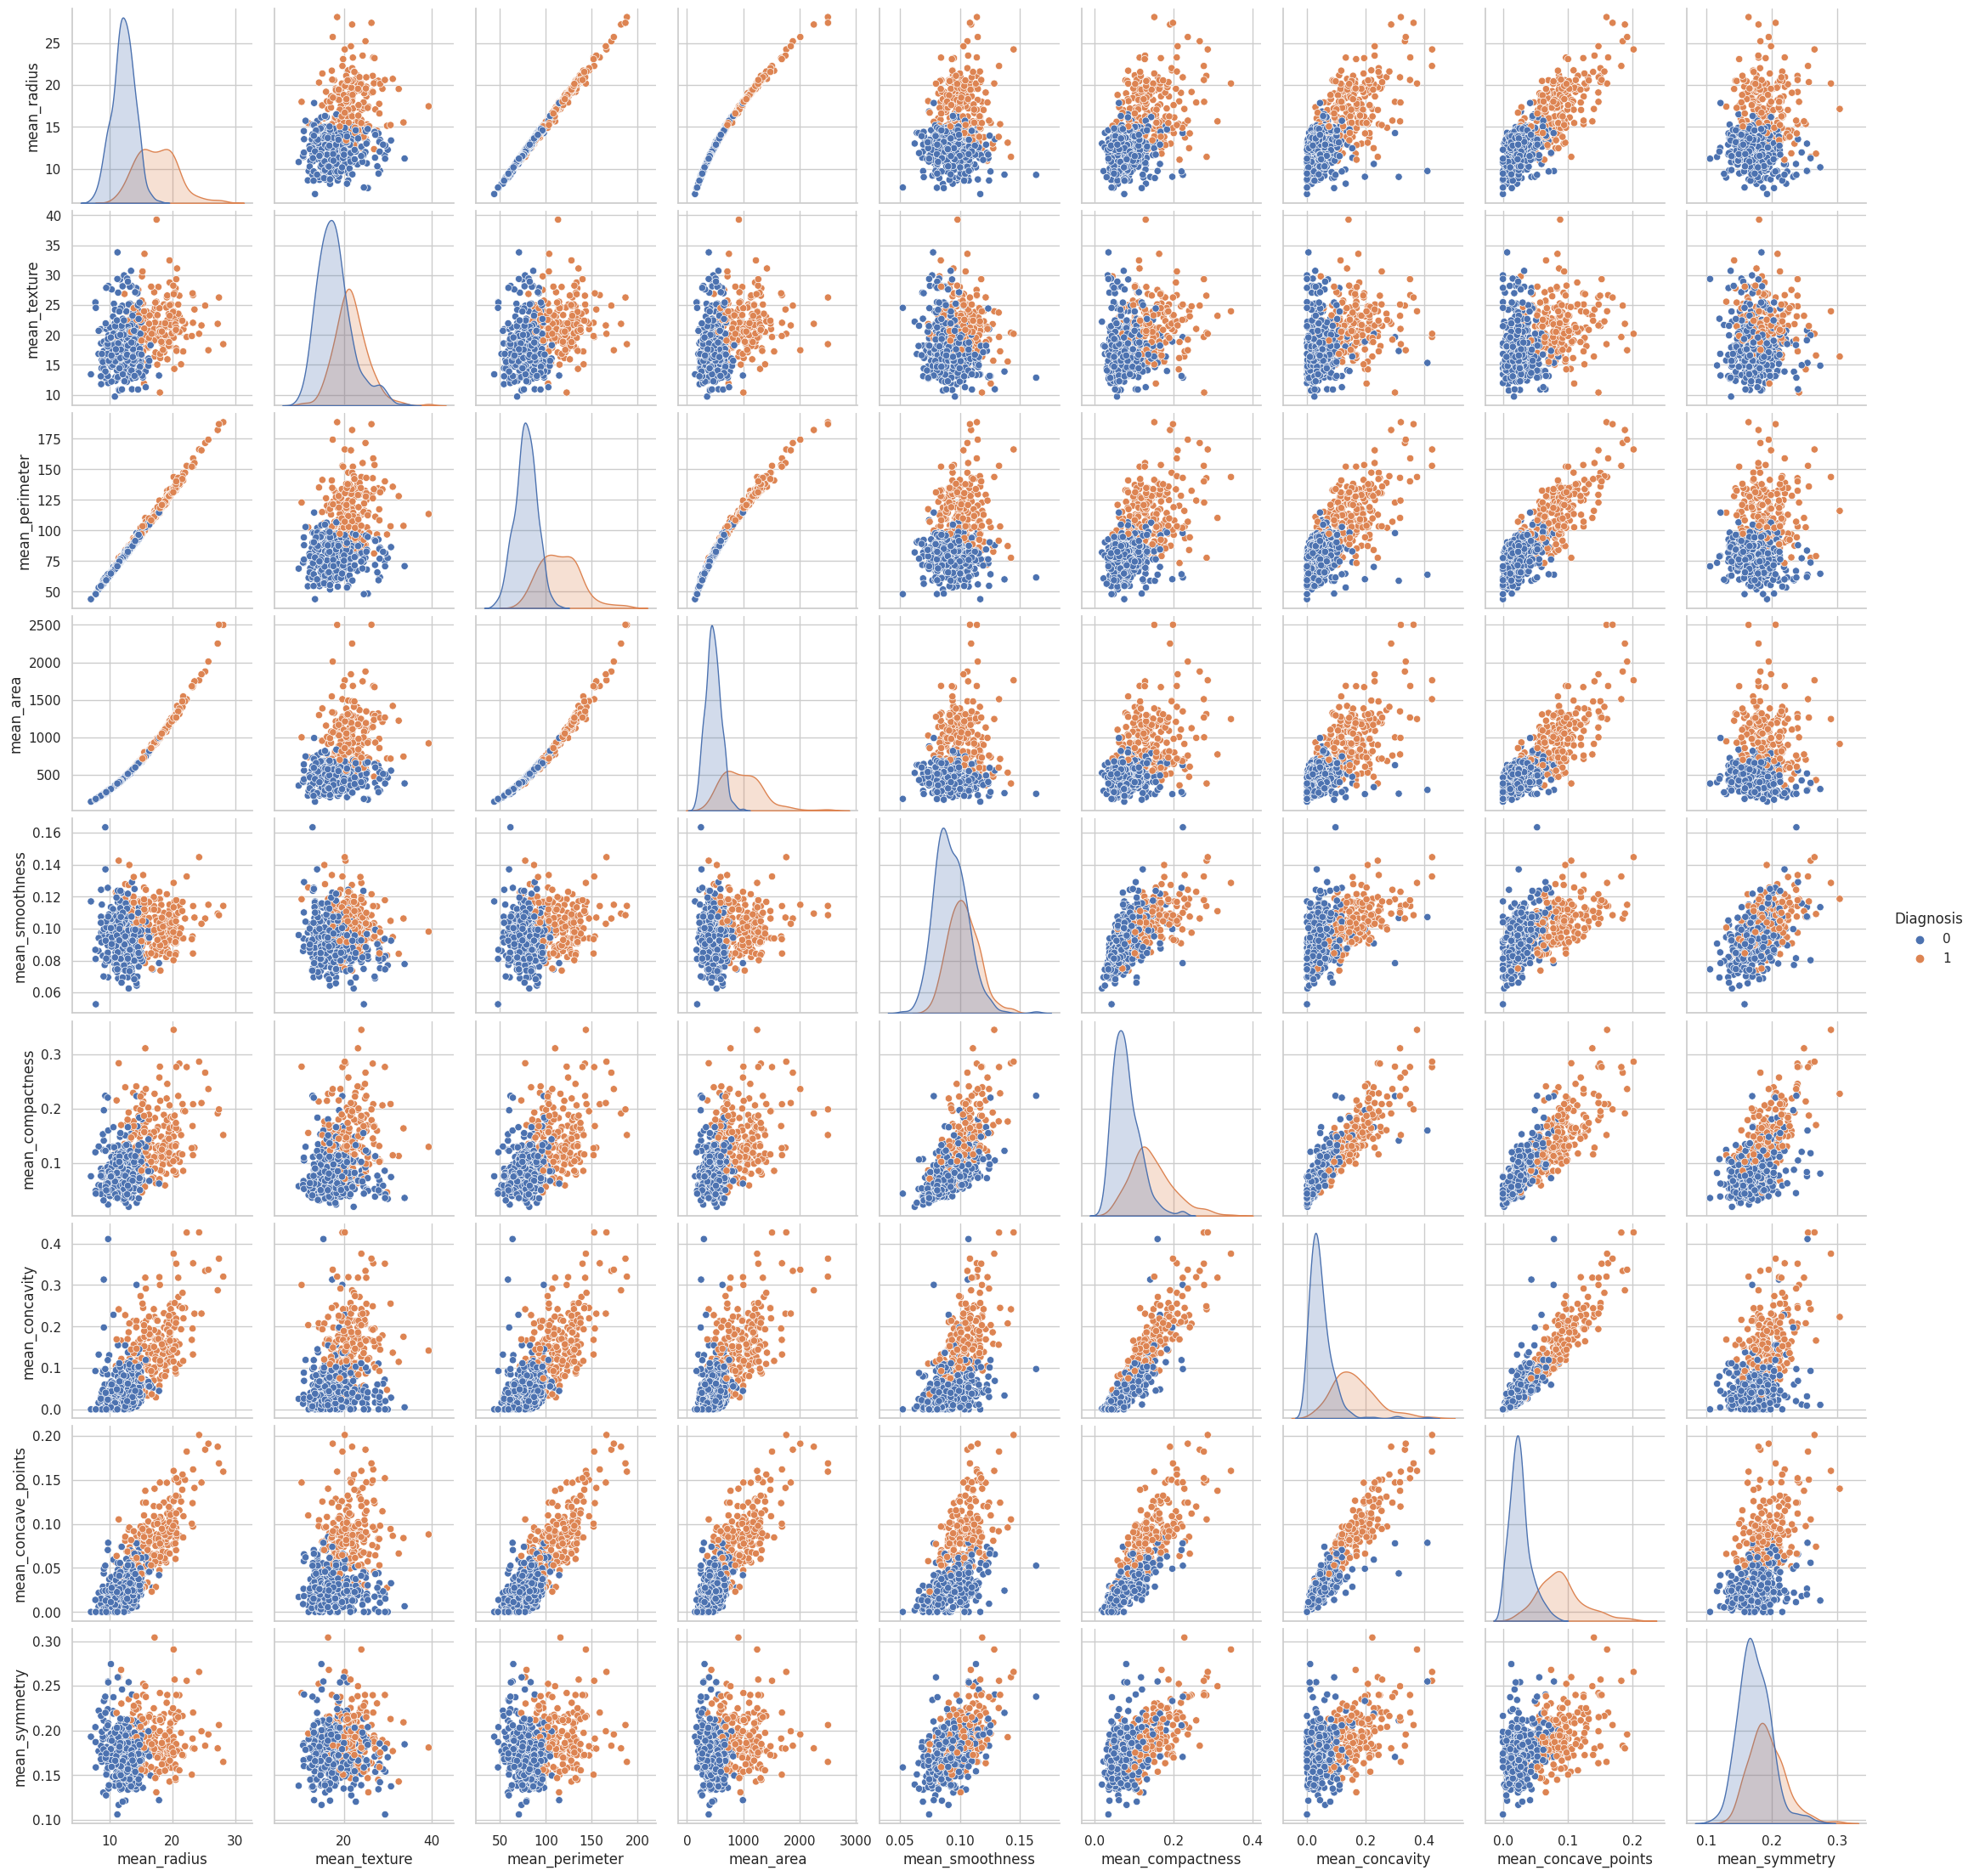

In [11]:
sns.pairplot(df.iloc[:,0:10], hue = 'Diagnosis')

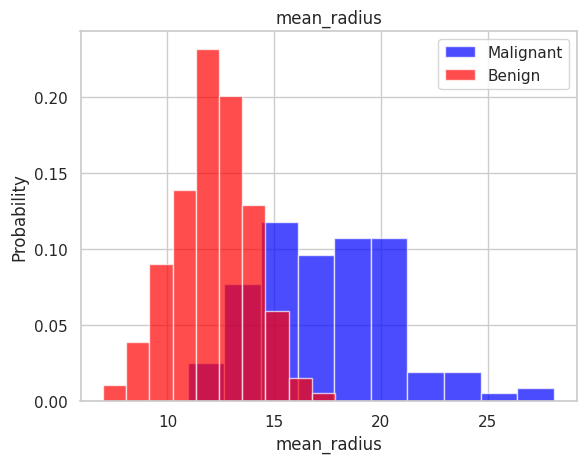

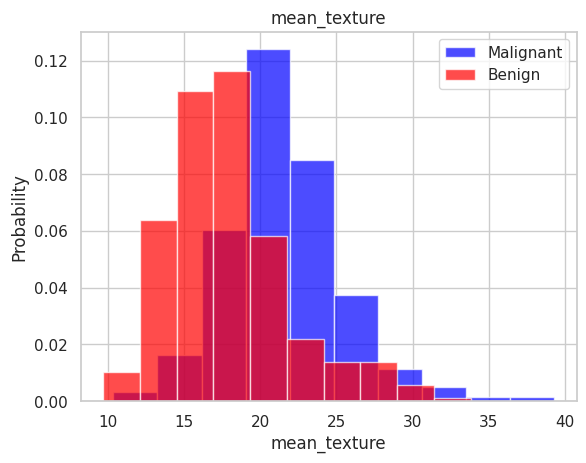

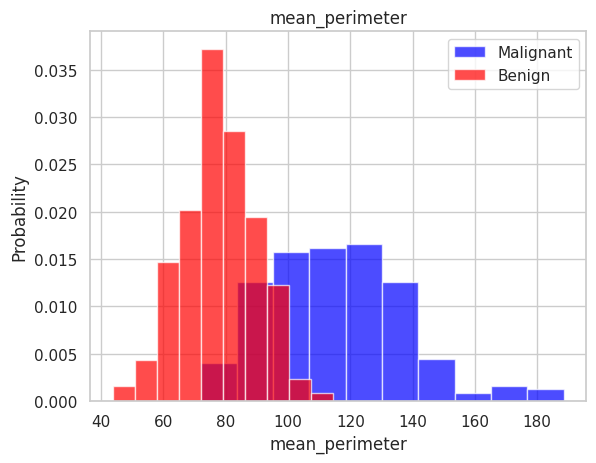

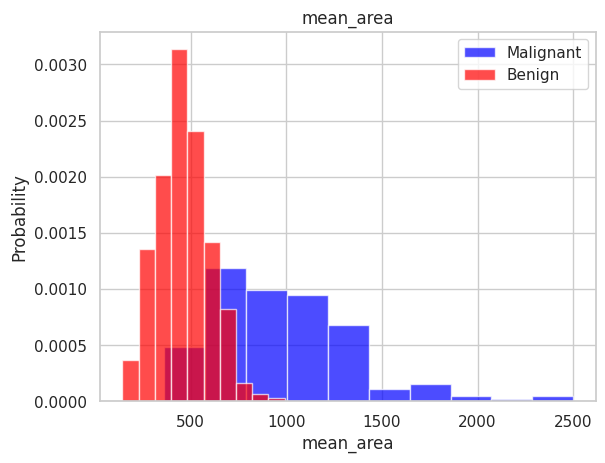

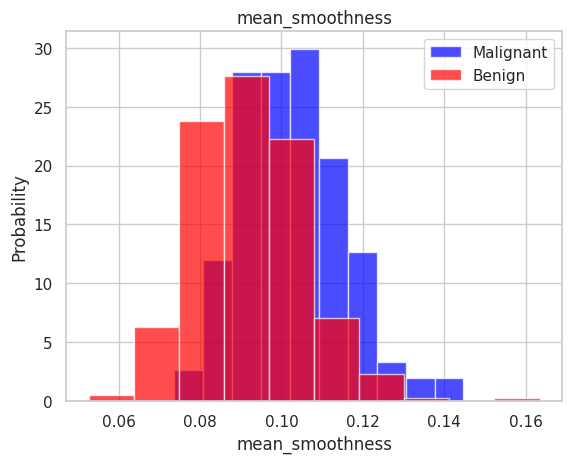

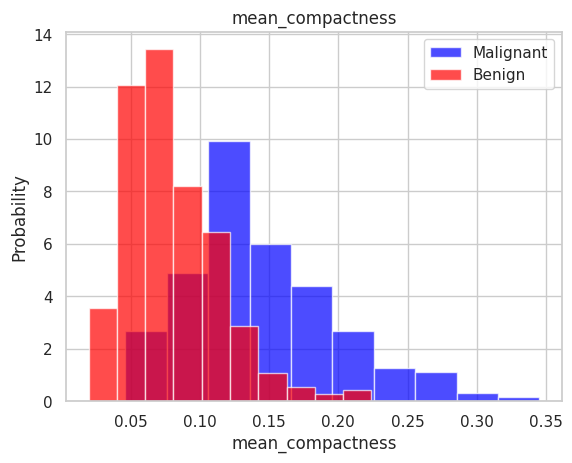

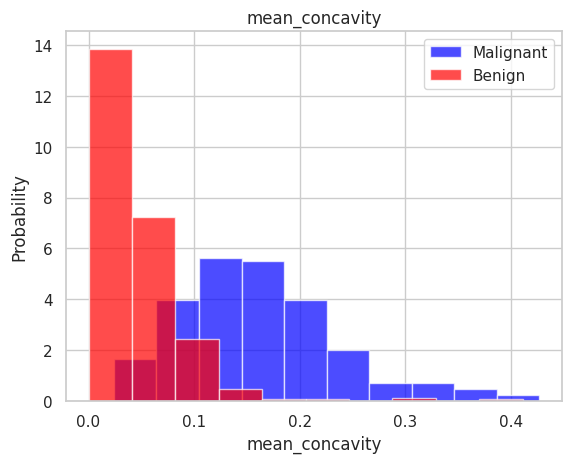

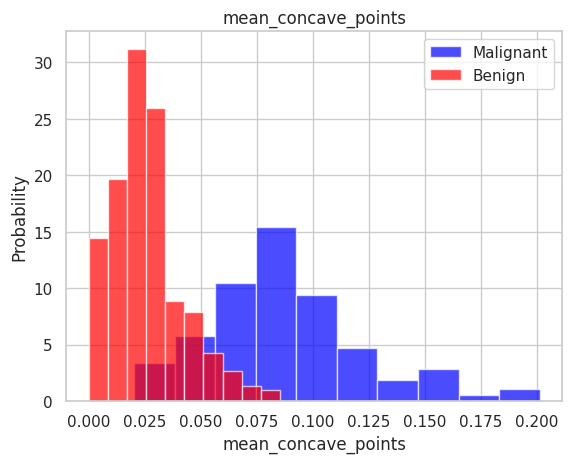

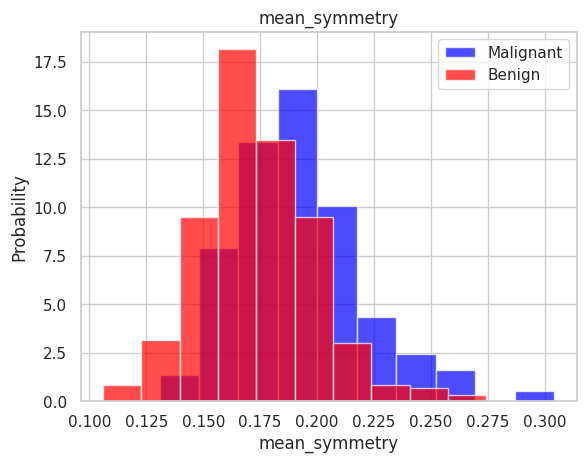

In [12]:
for i in df.columns[1:10]:
  plt.hist(df[df['Diagnosis']==1][i], color = 'blue', label='Malignant', alpha=0.7, density=True)
  plt.hist(df[df['Diagnosis']==0][i], color = 'red', label='Benign', alpha=0.7, density=True)
  plt.title(i)
  plt.ylabel("Probability")
  plt.xlabel(i)
  plt.legend()
  plt.show()

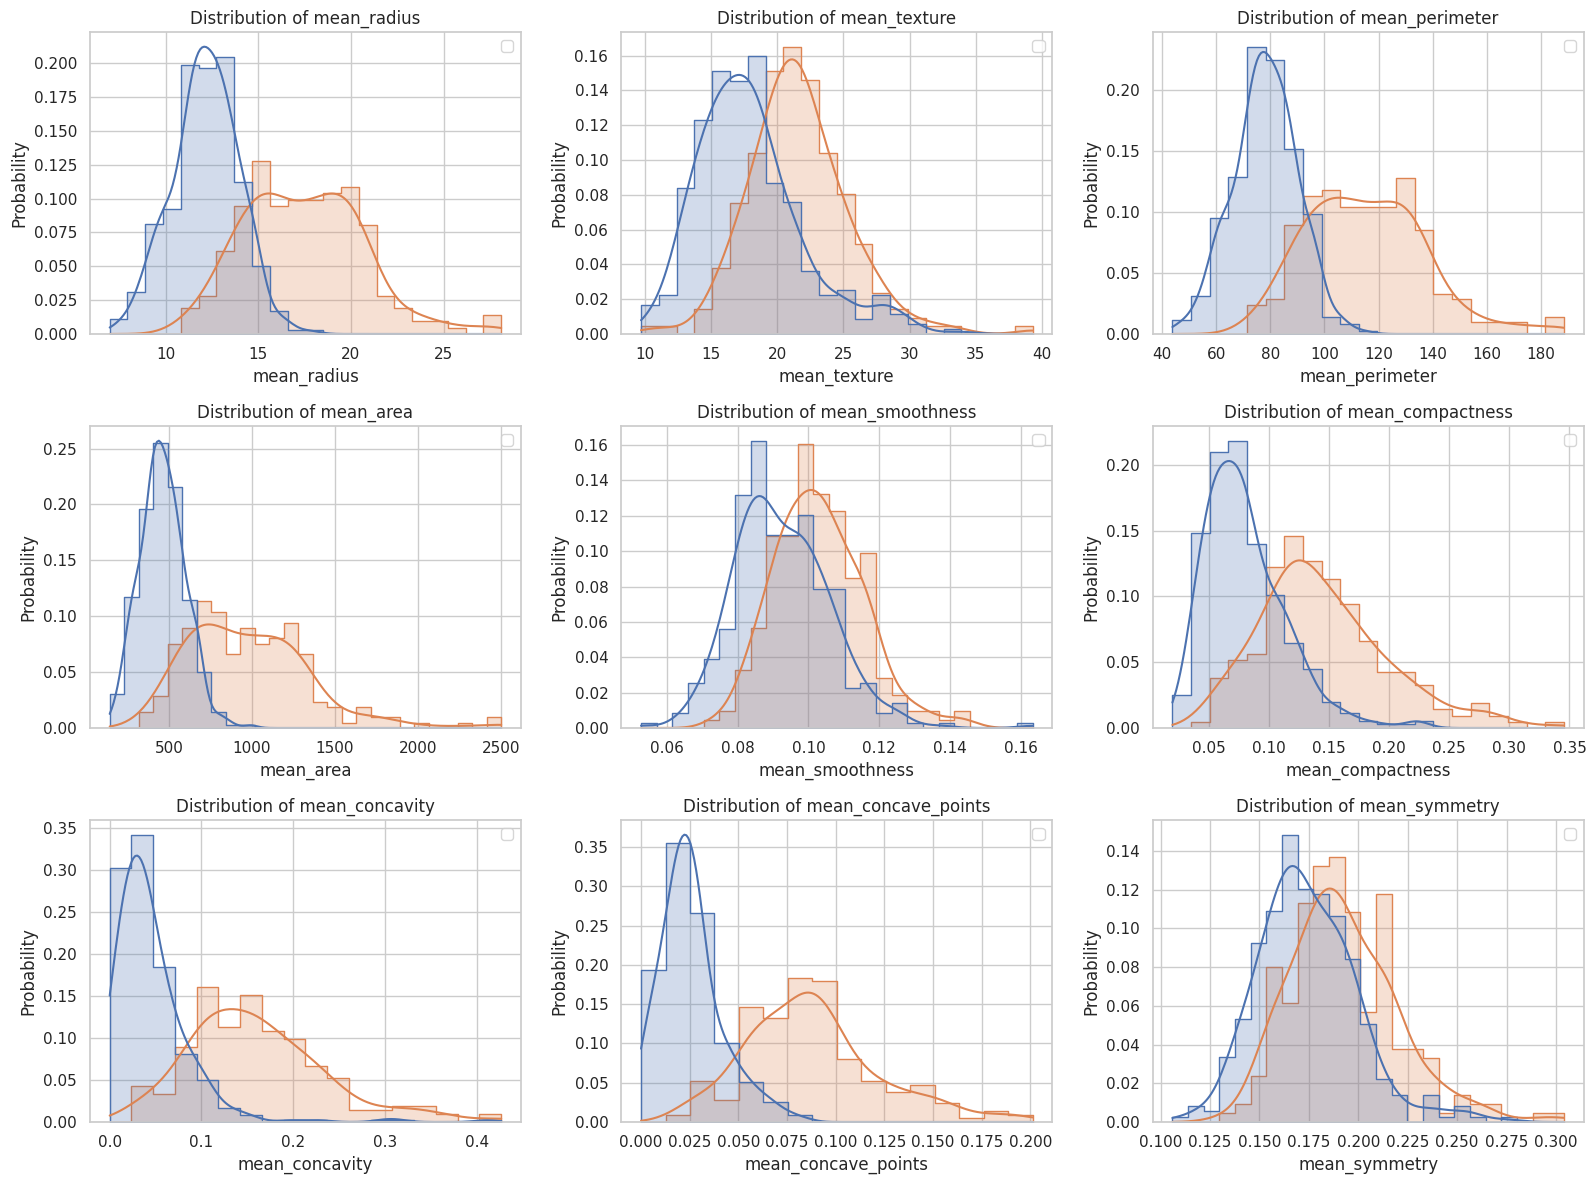

In [12]:
# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Loop through selected columns for histograms
for i, col in enumerate(df.columns[1:10]):
    # Plot histograms for Malignant (Diagnosis=1) and Benign (Diagnosis=0)
    sns.histplot(data=df, x=col, hue="Diagnosis", element="step", common_norm=False, stat="probability", kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribution of {col}")
    axes[i//3, i%3].set_xlabel(col)
    axes[i//3, i%3].set_ylabel("Probability")
    axes[i//3, i%3].legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Scaling / Normalization:

 Z-score normalization (Standard Scaling). This method centers the data around a mean of 0 with a standard deviation of 1 for each feature. The transformation is defined as
z
=
(
x
−
μ
)
σ
z=
σ
(x−μ)
​
 , where
x
x is the original feature value,
μ
μ is the mean of the feature, and
σ
σ is the standard deviation of the feature.

In [13]:
# Creating a new DataFrame with only the mean features
mean_features = [col for col in df.columns if 'mean' in col]
df_means = df[mean_features]

# Display the first few rows of the new DataFrame with mean features

df_means.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_factual_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### Train-Test Split
Splitting the dataset into a training set and a testing set is crucial for evaluating the model's performance.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y = df['Diagnosis']
# Splitting the reduced dataset (df_means) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_means, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Logistic Regression model
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train_scaled, y_train)



LogisticRegression()

In [22]:
# Making predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[103   5]
 [  6  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [18]:
from sklearn.naive_bayes import GaussianNB

# Creating and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
nb_predictions = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_predictions)


# Evaluating the model
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
class_report_nb = classification_report(y_test, nb_predictions)

# Display the results
print(f"Confusion Matrix:\n{conf_matrix_nb}")
print(f"Classification Report:\n{class_report_nb}")


Confusion Matrix:
[[103   5]
 [  8  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be tuned
knn_model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Evaluating the model
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
class_report_knn = classification_report(y_test, knn_predictions)

# Display the results
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{class_report_knn}")




Confusion Matrix:
[[103   5]
 [  5  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [20]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned
rf_model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Evaluating the model
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
class_report_rf = classification_report(y_test, rf_predictions)

# Display the results
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{class_report_rf}")

Confusion Matrix:
[[103   5]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Building the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
nn_model.add(Dense(8, activation='relu'))  # Hidden layer
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Evaluate the model
loss, accuracy_nn = nn_model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Accuracy: {accuracy_nn:.2f}")


Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.9083 - accuracy: 0.1635 - val_loss: 0.8135 - val_accuracy: 0.3000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.3711 - val_loss: 0.6862 - val_accuracy: 0.4500
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.5912 - val_loss: 0.6074 - val_accuracy: 0.6625
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.8145 - val_loss: 0.5493 - val_accuracy: 0.8625
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.8868 - val_loss: 0.4960 - val_accuracy: 0.9000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.9182 - val_loss: 0.4415 - val_accuracy: 0.9250
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4090 - accuracy: 0.9245 - val_loss: 0.3825 - val_accuracy: 0.9375
Epoch 8/100
3

In [36]:
# Comparing the models
models = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": rf_model,

}

# Evaluate and store accuracy for each model
model_accuracies = {}
for model_name, model in models.items():
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    model_accuracies[model_name] = accuracy

# Display model accuracies
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

print(f"Neural nets: Accuracy: {accuracy_nn:.2f}")

Logistic Regression: Accuracy = 0.94
Naive Bayes: Accuracy = 0.92
K-Nearest Neighbors: Accuracy = 0.94
Random Forest: Accuracy = 0.95
Neural nets: Accuracy: 0.97
